# Triangle Pattern Analysis - 1.4.1
## Comprehensive Triangle Pattern Detection with Breakout Validation

**Triangle Pattern Types:**
- **Ascending Triangle**: Horizontal resistance, rising support (bullish)
- **Descending Triangle**: Horizontal support, falling resistance (bearish)  
- **Symmetrical Triangle**: Converging trendlines (continuation pattern)
- **Expanding Triangle**: Diverging trendlines (volatility pattern)

**Key Features:**
- **Trendline Validation**: Minimum 3 touches per line with statistical significance
- **Convergence Analysis**: Proper angle convergence for symmetrical triangles
- **Volume Confirmation**: Decreasing volume during formation, spike on breakout
- **Breakout Validation**: Price confirmation beyond triangle boundaries
- **Multiple Timeframes**: 5-365 day patterns across different market cycles

In [24]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Set up plotting with WHITE background
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
sns.set_palette("husl")

# Import our modular scripts
from scripts.trendline_extractor import TrendlineExtractor
from scripts.pattern_detector import TechnicalPatternDetector
from scripts.stock_data_loader import check_database_contents

print("📦 Libraries and scripts imported successfully!")
print("🔺 Ready for comprehensive TRIANGLE pattern analysis")

📦 Libraries and scripts imported successfully!
🔺 Ready for comprehensive TRIANGLE pattern analysis


In [25]:
# Configuration for Triangle Pattern Analysis
SYMBOL = 'QQQ'  # Change this to test different stocks
LOOKBACK_DAYS = 1000  # Maximum available data
MIN_PATTERN_STRENGTH = 0.3  # Higher threshold for quality patterns

# Triangle pattern timeframe windows
TRIANGLE_WINDOWS = {
    'Very Short': {'min_width': 5, 'max_width': 20},     # 5-20 days
    'Short-term': {'min_width': 15, 'max_width': 45},    # 15-45 days
    'Medium-term': {'min_width': 30, 'max_width': 90},   # 30-90 days
    'Long-term': {'min_width': 60, 'max_width': 180},    # 60-180 days
    'Very Long': {'min_width': 120, 'max_width': 365}    # 120-365 days
}

print(f"🔺 Triangle Pattern Analysis Configuration:")
print(f"   Symbol: {SYMBOL}")
print(f"   Lookback: {LOOKBACK_DAYS} days")
print(f"   Min pattern strength: {MIN_PATTERN_STRENGTH} (quality focus)")
print(f"   Triangle timeframe windows:")
for timeframe, config in TRIANGLE_WINDOWS.items():
    print(f"   {timeframe}: {config['min_width']}-{config['max_width']} days")

# Load data using existing infrastructure
extractor = TrendlineExtractor(symbol=SYMBOL, lookback_days=LOOKBACK_DAYS)
print(f"\n✅ TrendlineExtractor created for {SYMBOL}")

🔺 Triangle Pattern Analysis Configuration:
   Symbol: QQQ
   Lookback: 1000 days
   Min pattern strength: 0.3 (quality focus)
   Triangle timeframe windows:
   Very Short: 5-20 days
   Short-term: 15-45 days
   Medium-term: 30-90 days
   Long-term: 60-180 days
   Very Long: 120-365 days

✅ TrendlineExtractor created for QQQ


In [26]:
# Load stock data and detect pivot points
print("📊 Loading stock data and detecting pivot points for triangle analysis...")
stock_data = extractor.load_data()
pivots, swing_highs, swing_lows = extractor.detect_pivots(
    methods=['scipy', 'rolling', 'zigzag', 'fractal', 'slope', 'derivative']
)

# Separate and sort pivots
high_pivots = [p for p in pivots if p['type'] == 'high']
low_pivots = [p for p in pivots if p['type'] == 'low']
high_pivots.sort(key=lambda x: x['date'])
low_pivots.sort(key=lambda x: x['date'])

print(f"\n📍 Pivot Point Summary for Triangle Detection:")
print(f"   Total pivots: {len(pivots)}")
print(f"   High pivots: {len(high_pivots)}")
print(f"   Low pivots: {len(low_pivots)}")
print(f"   Date range: {stock_data['Date'].min().strftime('%Y-%m-%d')} to {stock_data['Date'].max().strftime('%Y-%m-%d')}")
print(f"   Price range: ${stock_data['Price'].min():.2f} - ${stock_data['Price'].max():.2f}")

# Add volume analysis if available
if 'Volume' in stock_data.columns:
    print(f"   📊 Volume data available for triangle validation")
    avg_volume = stock_data['Volume'].mean()
    print(f"   Average volume: {avg_volume:,.0f}")
else:
    print(f"   ⚠️ No volume data available (price-only analysis)")

print(f"\n✅ Data loaded successfully for triangle pattern analysis")

📊 Loading stock data and detecting pivot points for triangle analysis...
🔍 Loading data for QQQ...
📋 Database Contents:
symbol timeframe  record_count earliest_date latest_date
  AAPL        1D         14026    1980-12-08  2025-09-02
 GOOGL        1D          6612    2004-08-01  2025-09-02
  MSFT        1D         12414    1986-03-01  2025-09-02
   QQQ        1D          6907    1999-03-01  2025-09-05
📊 Loading QQQ data from local database (timeframe: 1D)...


📊 Before filtering: 6907 candles
📊 After filtering: 5249 candles (removed 1658 premarket/afterhours)
✅ Got exactly 1000 trading days (requested 1000)
✅ Final dataset: 1000 trading days for QQQ
   📅 Date range: 2020-08-21 to 2025-09-05
   📅 Calendar span: 1841 days (60.6 months)
   💰 Price range: $260.10 - $580.34
   📈 LogPrice range: 5.5611 - 6.3636
   📊 Current price: $576.06 (log: 6.3562)
✅ Loaded 1000 data points for QQQ
🔍 Detecting pivots for QQQ...
🔍 Ultra-enhanced LOG SCALE pivot detection using methods: ['scipy', 'rolling', 'zigzag', 'fractal', 'slope', 'derivative']
   📈 Working with log prices: 5.5611 to 6.3636
   📊 Method 1: Scipy argrelextrema with multiple windows (LOG SCALE)
      Found 890 scipy pivots
   📊 Method 2: Rolling window extremes (LOG SCALE)
      Found 1220 rolling pivots
   📊 Method 3: ZigZag percentage-based detection (LOG SCALE)
      Found 796 zigzag pivots
   📊 Method 4: Fractal pattern detection (LOG SCALE)
      Found 267 fractal pivots
   📊 Method 5: S

In [27]:
# Advanced Triangle Pattern Detector
class AdvancedTriangleDetector(TechnicalPatternDetector):
    """Advanced Triangle Pattern detector with statistical validation"""

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.min_touches = 3  # Minimum touches per trendline
        self.touch_tolerance = 0.015  # 1.5% tolerance for trendline touches

    def _calculate_trendline(self, points):
        """Calculate trendline using linear regression with statistical validation"""
        if len(points) < 2:
            return None

        # Convert dates to ordinal numbers for regression
        x = np.array([p['date'].toordinal() for p in points]).reshape(-1, 1)
        y = np.array([p['log_price'] for p in points])

        # Fit linear regression
        reg = LinearRegression().fit(x, y)
        r_squared = reg.score(x, y)

        # Calculate p-value for slope significance
        if len(points) > 2:
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                x.flatten(), y
            )
        else:
            p_value = 0.5  # Default for 2-point lines
            slope = reg.coef_[0]
            intercept = reg.intercept_

        return {
            'slope': slope,
            'intercept': intercept,
            'r_squared': r_squared,
            'p_value': p_value,
            'points': points,
            'touches': len(points)
        }

    def _find_trendline_touches(self, pivot_points, start_date, end_date, line_type='resistance'):
        """Find pivots that touch a potential trendline"""
        relevant_pivots = []
        for pivot in pivot_points:
            if start_date <= pivot['date'] <= end_date:
                relevant_pivots.append(pivot)

        if len(relevant_pivots) < 2:
            return []

        # Try different combinations to find best trendline
        best_trendlines = []

        # Start with first two points and try to extend
        for i in range(len(relevant_pivots)):
            for j in range(i + 1, len(relevant_pivots)):
                base_points = [relevant_pivots[i], relevant_pivots[j]]
                trendline = self._calculate_trendline(base_points)

                if not trendline:
                    continue

                # Find additional touches
                touching_points = base_points.copy()

                for k, pivot in enumerate(relevant_pivots):
                    if k == i or k == j:
                        continue

                    # Calculate expected price at this date
                    date_ordinal = pivot['date'].toordinal()
                    expected_log_price = trendline['slope'] * date_ordinal + trendline['intercept']
                    expected_price = np.exp(expected_log_price)

                    # Check if pivot touches the trendline within tolerance
                    price_diff = abs(pivot['price'] - expected_price) / expected_price

                    if price_diff <= self.touch_tolerance:
                        touching_points.append(pivot)

                # Recalculate trendline with all touching points
                if len(touching_points) >= self.min_touches:
                    final_trendline = self._calculate_trendline(touching_points)
                    if final_trendline and final_trendline['r_squared'] > 0.7:
                        best_trendlines.append(final_trendline)

        # Return best trendline (highest R-squared with most touches)
        if best_trendlines:
            best_trendlines.sort(key=lambda x: (x['touches'], x['r_squared']), reverse=True)
            return best_trendlines[:3]  # Return top 3

        return []

    def _classify_triangle(self, resistance_line, support_line, pattern_width):
        """Classify triangle type based on trendline slopes"""
        resistance_slope = resistance_line['slope']
        support_slope = support_line['slope']

        # Convert daily slopes to percentage
        resistance_slope_pct = resistance_slope * 365 * 100  # Annualized percentage
        support_slope_pct = support_slope * 365 * 100

        # Classification thresholds
        flat_threshold = 2.0  # 2% annual slope considered "flat"

        # Determine triangle type
        if abs(resistance_slope_pct) < flat_threshold and support_slope_pct > flat_threshold:
            return 'Ascending Triangle', 'bullish'
        elif abs(support_slope_pct) < flat_threshold and resistance_slope_pct < -flat_threshold:
            return 'Descending Triangle', 'bearish'
        elif resistance_slope_pct < -flat_threshold and support_slope_pct > flat_threshold:
            # Check convergence
            if abs(resistance_slope_pct) > abs(support_slope_pct) * 0.5:
                return 'Symmetrical Triangle', 'continuation'
        elif resistance_slope_pct > flat_threshold and support_slope_pct < -flat_threshold:
            return 'Expanding Triangle', 'volatility'

        return 'Undefined Triangle', 'neutral'

    def _validate_breakout(self, triangle_end_date, triangle_type, resistance_line, support_line, days_ahead=20):
        """Validate triangle breakout with price confirmation"""
        # Get post-triangle data
        breakout_start = triangle_end_date + timedelta(days=1)
        breakout_end = breakout_start + timedelta(days=days_ahead)

        mask = (self.stock_data['Date'] >= breakout_start) & (self.stock_data['Date'] <= breakout_end)
        breakout_data = self.stock_data[mask]

        if len(breakout_data) < 5:  # Need minimum data
            return None

        # Calculate triangle boundaries at breakout point
        breakout_ordinal = breakout_start.toordinal()
        resistance_price = np.exp(resistance_line['slope'] * breakout_ordinal + resistance_line['intercept'])
        support_price = np.exp(support_line['slope'] * breakout_ordinal + support_line['intercept'])

        # Check for breakout direction
        max_price = breakout_data['Price'].max()
        min_price = breakout_data['Price'].min()

        breakout_threshold = 0.02  # 2% breakout threshold

        if max_price > resistance_price * (1 + breakout_threshold):
            # Upward breakout
            breakout_strength = (max_price - resistance_price) / resistance_price
            return {
                'direction': 'bullish',
                'strength': breakout_strength,
                'confirmation': True,
                'breakout_price': max_price,
                'target_level': resistance_price
            }
        elif min_price < support_price * (1 - breakout_threshold):
            # Downward breakout
            breakout_strength = (support_price - min_price) / support_price
            return {
                'direction': 'bearish',
                'strength': breakout_strength,
                'confirmation': True,
                'breakout_price': min_price,
                'target_level': support_price
            }

        return None  # No significant breakout

    def detect_triangle_patterns(self, timeframe_config):
        """Detect triangle patterns with comprehensive validation"""
        self.min_pattern_width = timeframe_config['min_width']
        self.max_pattern_width = timeframe_config['max_width']

        patterns = []
        total_analyzed = 0

        print(f"   🔍 Analyzing triangle patterns...")

        # Use sliding window approach for better coverage
        data_start = self.stock_data['Date'].min()
        data_end = self.stock_data['Date'].max()

        # Slide window across the dataset
        current_start = data_start
        window_step = timedelta(days=max(5, self.min_pattern_width // 4))

        while current_start + timedelta(days=self.max_pattern_width) <= data_end:
            for pattern_days in range(self.min_pattern_width, self.max_pattern_width + 1, 5):
                pattern_start = current_start
                pattern_end = pattern_start + timedelta(days=pattern_days)

                if pattern_end > data_end:
                    break

                total_analyzed += 1

                # Find resistance trendlines (using high pivots)
                resistance_lines = self._find_trendline_touches(
                    self.high_pivots, pattern_start, pattern_end, 'resistance'
                )

                # Find support trendlines (using low pivots)
                support_lines = self._find_trendline_touches(
                    self.low_pivots, pattern_start, pattern_end, 'support'
                )

                # Try all combinations of resistance and support lines
                for resistance_line in resistance_lines:
                    for support_line in support_lines:

                        # Basic validation
                        if (resistance_line['touches'] < self.min_touches or
                            support_line['touches'] < self.min_touches):
                            continue

                        # Check that lines don't cross inappropriately within pattern
                        start_ordinal = pattern_start.toordinal()
                        end_ordinal = pattern_end.toordinal()

                        start_resistance = np.exp(resistance_line['slope'] * start_ordinal + resistance_line['intercept'])
                        start_support = np.exp(support_line['slope'] * start_ordinal + support_line['intercept'])
                        end_resistance = np.exp(resistance_line['slope'] * end_ordinal + resistance_line['intercept'])
                        end_support = np.exp(support_line['slope'] * end_ordinal + support_line['intercept'])

                        # Resistance should be above support
                        if (start_resistance <= start_support or end_resistance <= end_support):
                            continue

                        # Classify triangle type
                        triangle_type, direction = self._classify_triangle(
                            resistance_line, support_line, pattern_days
                        )

                        if triangle_type == 'Undefined Triangle':
                            continue

                        # Validate breakout
                        breakout_validation = self._validate_breakout(
                            pattern_end, triangle_type, resistance_line, support_line
                        )

                        # Calculate pattern confidence
                        trendline_quality = (resistance_line['r_squared'] + support_line['r_squared']) / 2
                        touch_score = min((resistance_line['touches'] + support_line['touches']) / 8, 1.0)
                        statistical_significance = 1.0 - min(resistance_line['p_value'], support_line['p_value'])

                        confidence = (trendline_quality * 0.4 + touch_score * 0.3 + statistical_significance * 0.3)

                        # Add breakout bonus
                        if breakout_validation:
                            confidence *= 1.2
                            confidence = min(confidence, 1.0)

                        if confidence >= self.min_strength:
                            patterns.append({
                                'type': triangle_type,
                                'direction': direction,
                                'confidence': confidence,
                                'start_date': pattern_start,
                                'end_date': pattern_end,
                                'pattern_width': pattern_days,
                                'timeframe': f"{self.min_pattern_width}-{self.max_pattern_width} days",
                                'resistance_line': resistance_line,
                                'support_line': support_line,
                                'breakout_validation': breakout_validation,
                                'metrics': {
                                    'trendline_quality': trendline_quality,
                                    'total_touches': resistance_line['touches'] + support_line['touches'],
                                    'statistical_significance': statistical_significance
                                }
                            })

                # Safety limit
                if total_analyzed > 10000:
                    print(f"   ⏰ Reached analysis limit of 10,000 windows")
                    break

            if total_analyzed > 10000:
                break

            current_start += window_step

        print(f"   📊 Analyzed {total_analyzed:,} potential triangle formations")

        # Remove overlapping patterns (keep best ones)
        if len(patterns) > 50:
            patterns.sort(key=lambda x: x['confidence'], reverse=True)

            # Remove overlaps
            filtered_patterns = []
            for pattern in patterns:
                overlap_found = False
                for existing in filtered_patterns:
                    # Check for significant overlap
                    overlap_start = max(pattern['start_date'], existing['start_date'])
                    overlap_end = min(pattern['end_date'], existing['end_date'])

                    if overlap_start < overlap_end:
                        overlap_days = (overlap_end - overlap_start).days
                        pattern_days = (pattern['end_date'] - pattern['start_date']).days

                        if overlap_days > pattern_days * 0.6:  # 60% overlap threshold
                            overlap_found = True
                            break

                if not overlap_found:
                    filtered_patterns.append(pattern)

                if len(filtered_patterns) >= 20:  # Keep top 20
                    break

            patterns = filtered_patterns

        return patterns

print("🔺 Advanced Triangle Pattern Detector created")
print("   ✅ Statistical trendline validation")
print("   ✅ Multiple triangle type classification")
print("   ✅ Breakout confirmation system")
print("   ✅ Quality-focused filtering")

🔺 Advanced Triangle Pattern Detector created
   ✅ Statistical trendline validation
   ✅ Multiple triangle type classification
   ✅ Breakout confirmation system
   ✅ Quality-focused filtering


In [28]:
# Run Triangle Pattern Analysis
print("🔺 Running Advanced Triangle Pattern Analysis...")
print("   ✅ Statistical trendline validation with R² > 0.7")
print("   ✅ Minimum 3 touches per trendline")
print("   ✅ Breakout confirmation within 20 days")
print("   ✅ Quality threshold: 0.3 (medium-high quality)")
print("="*70)

all_triangle_patterns = []

# Create triangle detector
triangle_detector = AdvancedTriangleDetector(
    stock_data=stock_data,
    high_pivots=high_pivots,
    low_pivots=low_pivots,
    min_strength=MIN_PATTERN_STRENGTH
)

# Detect triangle patterns for each timeframe
for timeframe_name, config in TRIANGLE_WINDOWS.items():
    print(f"\n🔺 Analyzing {timeframe_name} triangles ({config['min_width']}-{config['max_width']} days)...")

    triangles = triangle_detector.detect_triangle_patterns(config)

    # Tag with timeframe
    for pattern in triangles:
        pattern['timeframe_name'] = timeframe_name
        all_triangle_patterns.append(pattern)

    print(f"   ✅ Found: {len(triangles)} triangle patterns")

    # Show pattern breakdown by type
    if triangles:
        type_counts = {}
        for pattern in triangles:
            ptype = pattern['type']
            type_counts[ptype] = type_counts.get(ptype, 0) + 1

        for ptype, count in type_counts.items():
            print(f"      {ptype}: {count}")

# Final Results Summary
print(f"\n🔺 TRIANGLE PATTERN ANALYSIS RESULTS:")
print(f"   Total patterns found: {len(all_triangle_patterns)}")
print(f"   Dataset: {len(stock_data)} trading days")
print(f"   Analysis period: {stock_data['Date'].min().strftime('%Y-%m-%d')} to {stock_data['Date'].max().strftime('%Y-%m-%d')}")

if all_triangle_patterns:
    # Pattern type distribution
    print(f"\n📊 Triangle Pattern Distribution:")
    type_distribution = {}
    direction_distribution = {}

    for pattern in all_triangle_patterns:
        ptype = pattern['type']
        direction = pattern['direction']

        type_distribution[ptype] = type_distribution.get(ptype, 0) + 1
        direction_distribution[direction] = direction_distribution.get(direction, 0) + 1

    for ptype, count in type_distribution.items():
        percentage = (count / len(all_triangle_patterns)) * 100
        print(f"   {ptype}: {count} ({percentage:.1f}%)")

    print(f"\n📈 Direction Bias:")
    for direction, count in direction_distribution.items():
        percentage = (count / len(all_triangle_patterns)) * 100
        print(f"   {direction.title()}: {count} ({percentage:.1f}%)")

    # Quality metrics
    avg_confidence = np.mean([p['confidence'] for p in all_triangle_patterns])
    avg_touches = np.mean([p['metrics']['total_touches'] for p in all_triangle_patterns])
    breakout_confirmed = len([p for p in all_triangle_patterns if p['breakout_validation']])

    print(f"\n📊 Quality Metrics:")
    print(f"   Average confidence: {avg_confidence:.3f}")
    print(f"   Average total touches: {avg_touches:.1f}")
    print(f"   Breakout confirmed: {breakout_confirmed} ({breakout_confirmed/len(all_triangle_patterns)*100:.1f}%)")

    # Top patterns
    print(f"\n🏆 TOP 10 TRIANGLE PATTERNS:")
    top_triangles = sorted(all_triangle_patterns, key=lambda x: x['confidence'], reverse=True)[:10]

    for i, pattern in enumerate(top_triangles, 1):
        breakout_info = "✅ CONFIRMED" if pattern['breakout_validation'] else "⚠️ NO BREAKOUT"
        metrics = pattern['metrics']

        print(f"   {i:2d}. 🔺 {pattern['type']}")
        print(f"       Confidence: {pattern['confidence']:.3f} | Direction: {pattern['direction']}")
        print(f"       Period: {pattern['start_date'].strftime('%Y-%m-%d')} to {pattern['end_date'].strftime('%Y-%m-%d')} ({pattern['pattern_width']} days)")
        print(f"       Touches: {metrics['total_touches']} | Quality: {metrics['trendline_quality']:.3f} | {breakout_info}")
        print(f"       Timeframe: {pattern.get('timeframe_name', 'Unknown')}")

        if pattern['breakout_validation']:
            breakout = pattern['breakout_validation']
            print(f"       Breakout: {breakout['direction']} ({breakout['strength']:.1%} strength)")
        print()

else:
    print("\n⚠️ NO TRIANGLE PATTERNS FOUND")
    print("   Possible reasons:")
    print("   • Strict quality requirements (R² > 0.7, min 3 touches)")
    print("   • QQQ's smooth ETF price action")
    print("   • Predominantly trending market (fewer consolidations)")
    print("   • Try lowering MIN_PATTERN_STRENGTH or analyzing individual stocks")

print(f"\n✅ Triangle pattern analysis complete!")

🔺 Running Advanced Triangle Pattern Analysis...
   ✅ Statistical trendline validation with R² > 0.7
   ✅ Minimum 3 touches per trendline
   ✅ Breakout confirmation within 20 days
   ✅ Quality threshold: 0.3 (medium-high quality)
🔍 Pattern Detector initialized:
   High pivots: 276
   Low pivots: 276
   Min strength: 0.3
   Pattern width: 10-120 days

🔺 Analyzing Very Short triangles (5-20 days)...
   🔍 Analyzing triangle patterns...
   📊 Analyzed 1,460 potential triangle formations
   ✅ Found: 8 triangle patterns
      Expanding Triangle: 7
      Symmetrical Triangle: 1

🔺 Analyzing Short-term triangles (15-45 days)...
   🔍 Analyzing triangle patterns...
   📊 Analyzed 2,520 potential triangle formations
   ✅ Found: 17 triangle patterns
      Symmetrical Triangle: 4
      Expanding Triangle: 13

🔺 Analyzing Medium-term triangles (30-90 days)...
   🔍 Analyzing triangle patterns...
   📊 Analyzed 3,263 potential triangle formations
   ✅ Found: 9 triangle patterns
      Expanding Triangle: 4

In [29]:
# Advanced Triangle Visualization
def visualize_triangle_patterns(stock_data, patterns, max_patterns=6):
    """Visualize triangle patterns with trendlines and breakout zones"""

    if not patterns:
        print("⚠️ No triangle patterns to visualize")
        return

    # Sort by confidence and take top patterns
    top_patterns = sorted(patterns, key=lambda x: x['confidence'], reverse=True)[:max_patterns]

    # Grid layout
    cols = 2
    rows = (len(top_patterns) + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(20, 8*rows))
    if rows == 1 and cols == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes
    else:
        axes = axes.flatten()

    triangle_colors = {
        'Ascending Triangle': 'green',
        'Descending Triangle': 'red',
        'Symmetrical Triangle': 'blue',
        'Expanding Triangle': 'orange'
    }

    for idx, pattern in enumerate(top_patterns):
        ax = axes[idx]

        # Extended time range for visualization
        buffer_days = max(30, pattern['pattern_width'] // 3)
        start_date = pattern['start_date'] - timedelta(days=buffer_days)
        end_date = pattern['end_date'] + timedelta(days=buffer_days * 2)  # More space for breakout

        start_date = max(start_date, stock_data['Date'].min())
        end_date = min(end_date, stock_data['Date'].max())

        mask = (stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)
        plot_data = stock_data[mask]

        if len(plot_data) == 0:
            continue

        # Plot price data
        ax.plot(plot_data['Date'], plot_data['Price'], 'black',
               linewidth=2, alpha=0.8, label=f'{SYMBOL} Price', zorder=5)

        # Highlight triangle formation period
        triangle_mask = (plot_data['Date'] >= pattern['start_date']) & (plot_data['Date'] <= pattern['end_date'])
        triangle_data = plot_data[triangle_mask]

        if len(triangle_data) > 0:
            ax.plot(triangle_data['Date'], triangle_data['Price'],
                   color=triangle_colors.get(pattern['type'], 'purple'),
                   linewidth=4, alpha=0.9, label='Triangle Formation', zorder=6)

        # Draw resistance trendline
        resistance_line = pattern['resistance_line']
        resistance_dates = [p['date'] for p in resistance_line['points']]
        resistance_prices = [p['price'] for p in resistance_line['points']]

        # Plot resistance touch points
        ax.scatter(resistance_dates, resistance_prices,
                  color='red', marker='^', s=100, alpha=0.8,
                  edgecolor='darkred', linewidth=2, zorder=8,
                  label=f'Resistance Touches ({len(resistance_dates)})')

        # Draw extended resistance trendline
        line_start = max(start_date, min(resistance_dates) - timedelta(days=10))
        line_end = min(end_date, max(resistance_dates) + timedelta(days=40))

        start_ordinal = line_start.toordinal()
        end_ordinal = line_end.toordinal()

        start_resistance = np.exp(resistance_line['slope'] * start_ordinal + resistance_line['intercept'])
        end_resistance = np.exp(resistance_line['slope'] * end_ordinal + resistance_line['intercept'])

        ax.plot([line_start, line_end], [start_resistance, end_resistance],
               '--', color='red', linewidth=3, alpha=0.8,
               label=f'Resistance Line (R²={resistance_line["r_squared"]:.2f})', zorder=7)

        # Draw support trendline
        support_line = pattern['support_line']
        support_dates = [p['date'] for p in support_line['points']]
        support_prices = [p['price'] for p in support_line['points']]

        # Plot support touch points
        ax.scatter(support_dates, support_prices,
                  color='green', marker='v', s=100, alpha=0.8,
                  edgecolor='darkgreen', linewidth=2, zorder=8,
                  label=f'Support Touches ({len(support_dates)})')

        # Draw extended support trendline
        start_support = np.exp(support_line['slope'] * start_ordinal + support_line['intercept'])
        end_support = np.exp(support_line['slope'] * end_ordinal + support_line['intercept'])

        ax.plot([line_start, line_end], [start_support, end_support],
               '--', color='green', linewidth=3, alpha=0.8,
               label=f'Support Line (R²={support_line["r_squared"]:.2f})', zorder=7)

        # Highlight triangle area
        triangle_start_ordinal = pattern['start_date'].toordinal()
        triangle_end_ordinal = pattern['end_date'].toordinal()

        triangle_start_resistance = np.exp(resistance_line['slope'] * triangle_start_ordinal + resistance_line['intercept'])
        triangle_start_support = np.exp(support_line['slope'] * triangle_start_ordinal + support_line['intercept'])
        triangle_end_resistance = np.exp(resistance_line['slope'] * triangle_end_ordinal + resistance_line['intercept'])
        triangle_end_support = np.exp(support_line['slope'] * triangle_end_ordinal + support_line['intercept'])

        # Fill triangle area
        triangle_x = [pattern['start_date'], pattern['end_date'], pattern['end_date'], pattern['start_date']]
        triangle_y = [triangle_start_resistance, triangle_end_resistance, triangle_end_support, triangle_start_support]

        ax.fill(triangle_x, triangle_y,
               color=triangle_colors.get(pattern['type'], 'purple'),
               alpha=0.1, zorder=3)

        # Show breakout information
        if pattern['breakout_validation']:
            breakout = pattern['breakout_validation']
            breakout_color = 'green' if breakout['direction'] == 'bullish' else 'red'

            # Mark breakout point
            ax.axvline(x=pattern['end_date'], color=breakout_color,
                      linestyle=':', linewidth=3, alpha=0.8,
                      label=f'Breakout ({breakout["direction"]})', zorder=4)

            # Add breakout strength annotation
            ax.annotate(f'Breakout: {breakout["strength"]:.1%}',
                       xy=(pattern['end_date'], breakout['breakout_price']),
                       xytext=(10, 10), textcoords='offset points',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor=breakout_color, alpha=0.3),
                       fontsize=8, fontweight='bold')

        # Pattern information box
        info_lines = [
            f"TYPE: {pattern['type']}",
            f"CONFIDENCE: {pattern['confidence']:.3f}",
            f"DIRECTION: {pattern['direction'].upper()}",
            f"DURATION: {pattern['pattern_width']} days",
            f"TIMEFRAME: {pattern.get('timeframe_name', 'Unknown')}",
            f"TOTAL TOUCHES: {pattern['metrics']['total_touches']}",
            f"QUALITY: {pattern['metrics']['trendline_quality']:.3f}"
        ]

        if pattern['breakout_validation']:
            info_lines.append(f"BREAKOUT: ✅ {pattern['breakout_validation']['direction'].upper()}")
        else:
            info_lines.append("BREAKOUT: ⚠️ NONE")

        ax.text(0.02, 0.98, '\n'.join(info_lines),
               transform=ax.transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9),
               fontsize=8, fontweight='bold')

        # Styling
        pattern_color = triangle_colors.get(pattern['type'], 'purple')
        ax.set_title(f"{pattern['type']} Pattern\n"
                    f"Confidence: {pattern['confidence']:.3f} | "
                    f"{pattern['start_date'].strftime('%Y-%m-%d')} to {pattern['end_date'].strftime('%Y-%m-%d')}",
                    fontsize=12, fontweight='bold', color=pattern_color)

        ax.set_xlabel('Date', fontweight='bold')
        ax.set_ylabel('Price ($)', fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)

        # Legend for first chart only to save space
        if idx == 0:
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=7)

    # Hide empty subplots
    for idx in range(len(top_patterns), len(axes)):
        axes[idx].set_visible(False)

    plt.suptitle(f'{SYMBOL} - Triangle Patterns with Breakout Analysis',
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("🎨 Advanced triangle visualization function ready")
print("   ✅ Multiple triangle types with color coding")
print("   ✅ Statistical trendline quality indicators")
print("   ✅ Breakout validation and strength metrics")
print("   ✅ Extended trendlines for projection analysis")

🎨 Advanced triangle visualization function ready
   ✅ Multiple triangle types with color coding
   ✅ Statistical trendline quality indicators
   ✅ Breakout validation and strength metrics
   ✅ Extended trendlines for projection analysis


🔺 Visualizing 45 triangle patterns found...
   ✅ Advanced statistical validation with trendline quality
   ✅ Breakout confirmation analysis


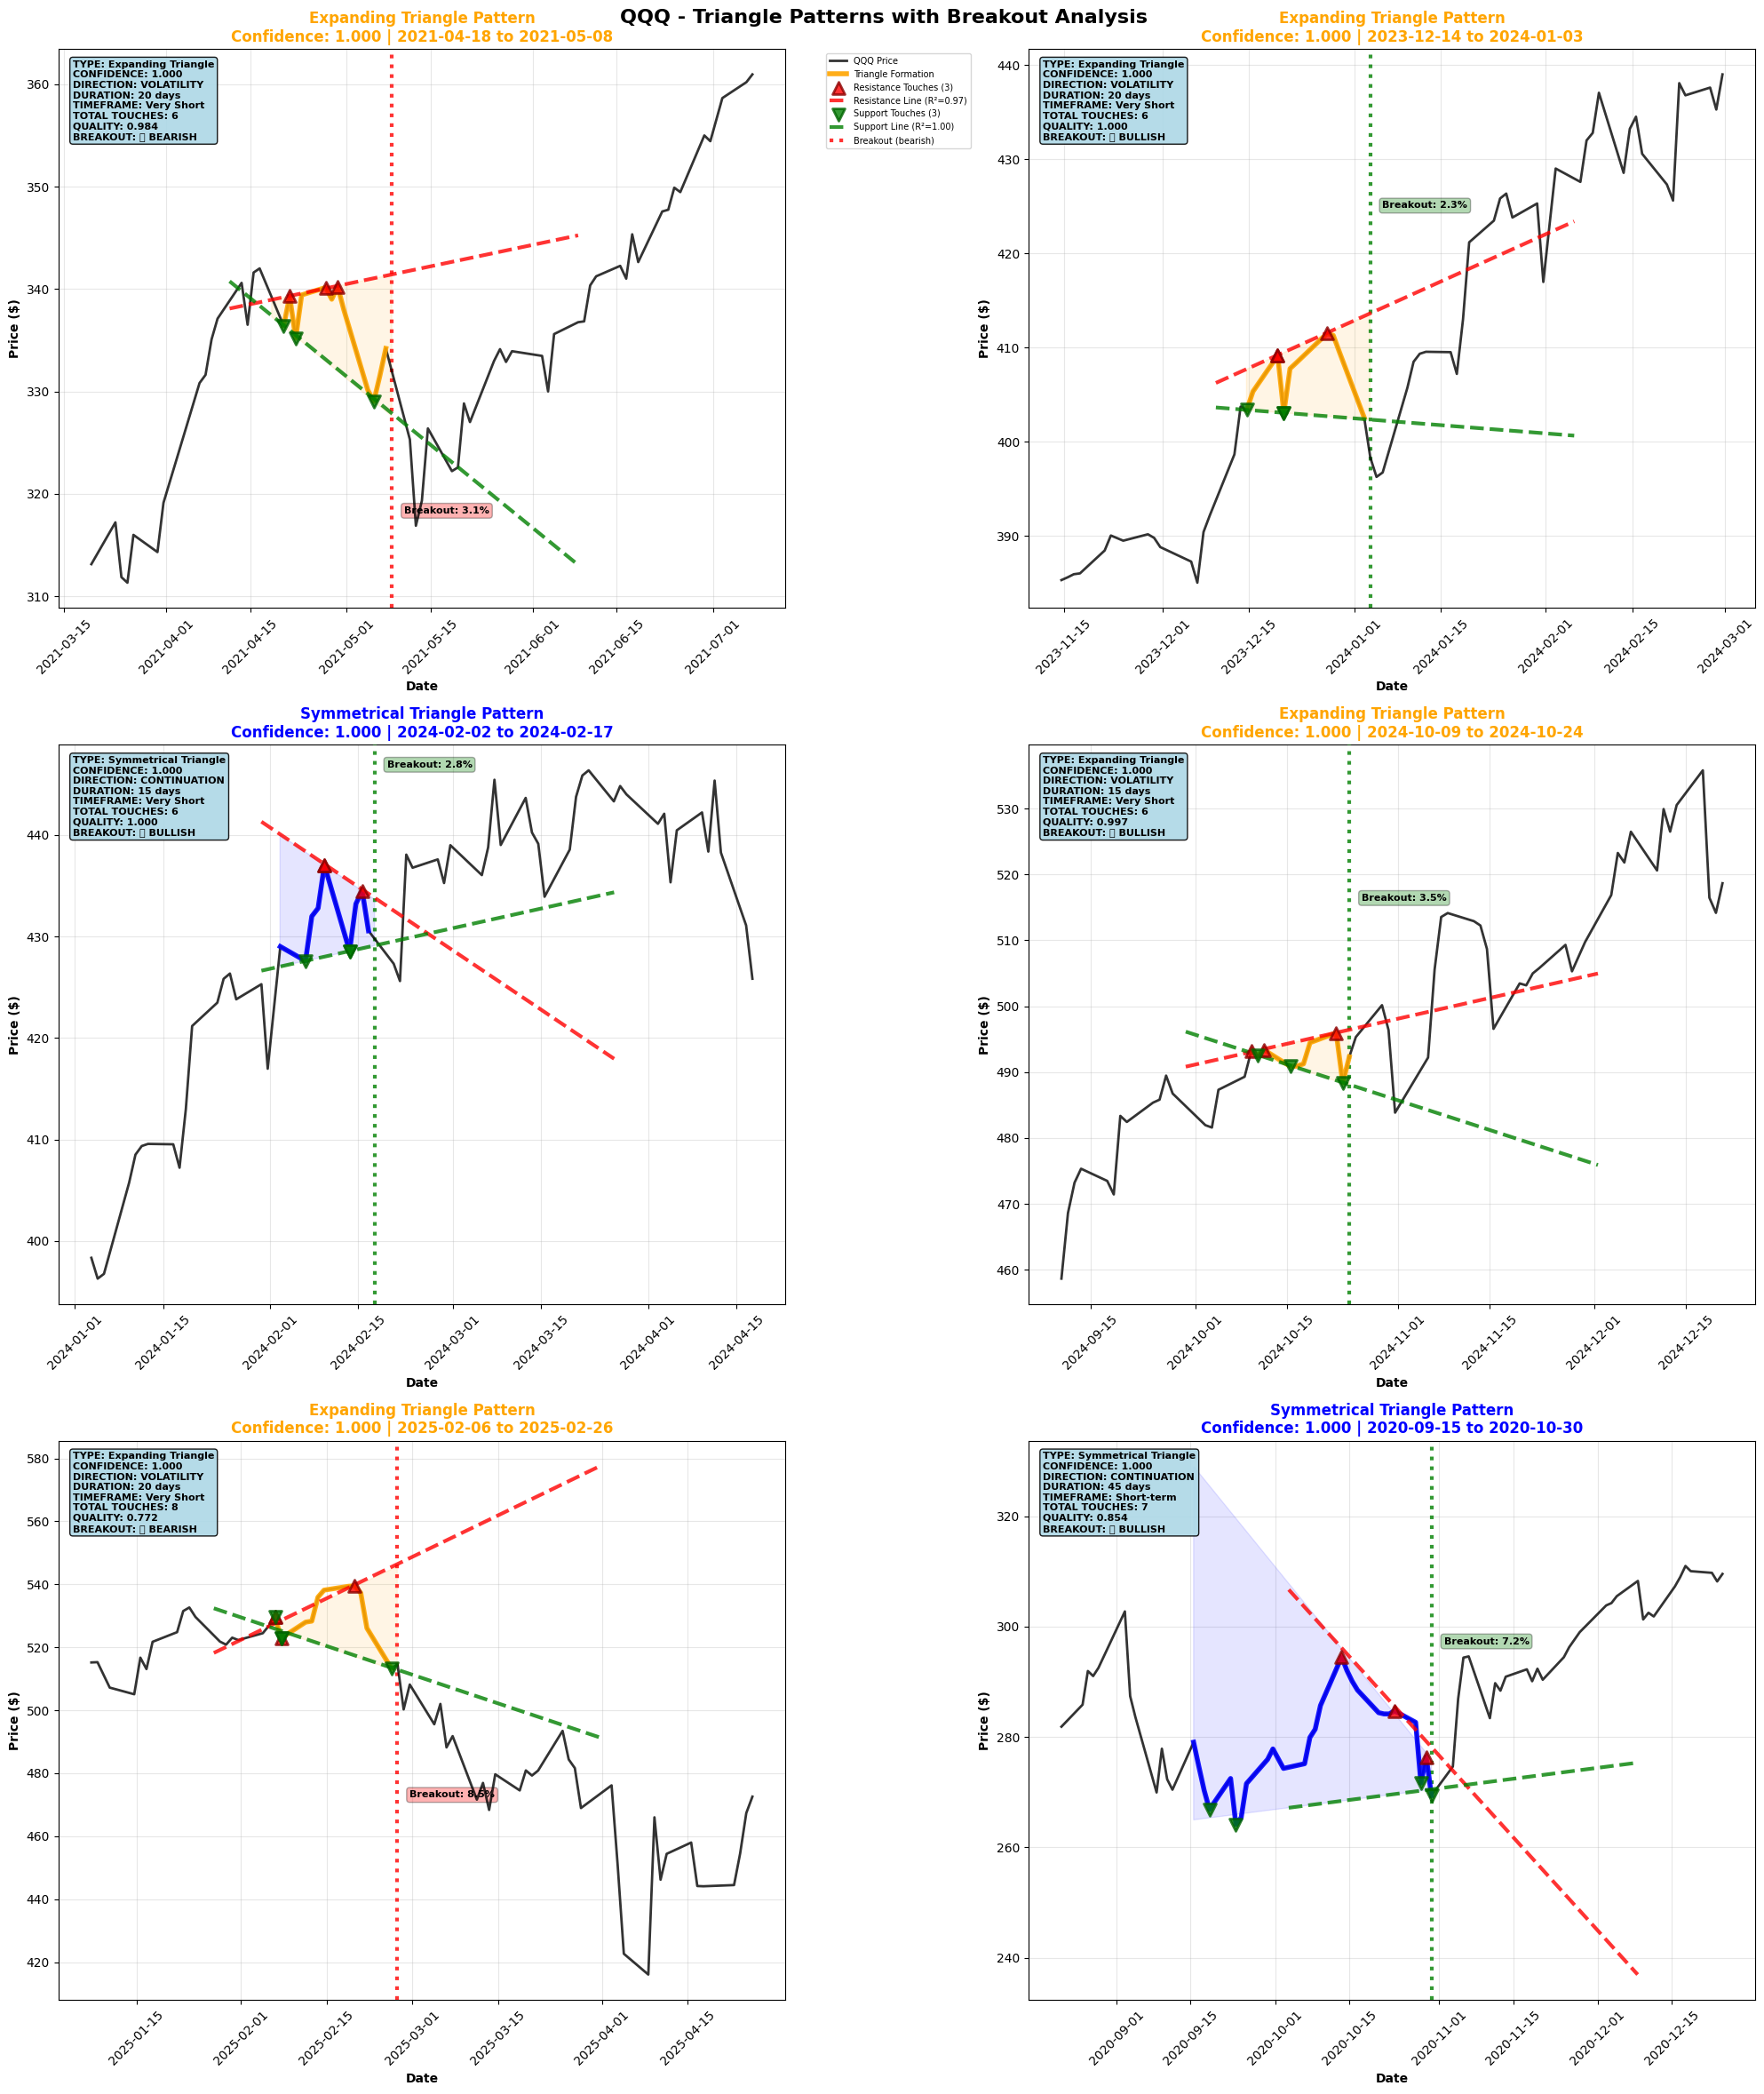


📊 DETAILED TRIANGLE ANALYSIS:
   📈 Pattern Success Rate: 80.0% (36/45)

📅 Timeframe Effectiveness:
   Very Short: 5/8 patterns (62.5% success)
   Short-term: 13/17 patterns (76.5% success)
   Medium-term: 9/9 patterns (100.0% success)
   Long-term: 6/7 patterns (85.7% success)
   Very Long: 3/4 patterns (75.0% success)

🔺 Triangle Type Analysis:
   Expanding Triangle:
      Patterns: 32 | Success: 71.9% | Avg Confidence: 0.973
   Symmetrical Triangle:
      Patterns: 13 | Success: 100.0% | Avg Confidence: 1.000

📅 Recent Patterns (Last 2 Years):
   Total recent patterns: 19
   Recent success rate: 84.2%

🔺 MOST RECENT TRIANGLE PATTERNS:
   1. Expanding Triangle | Conf: 1.000
      2025-02-26 | ✅ CONFIRMED
      Breakout: bearish (8.5%)

   2. Expanding Triangle | Conf: 1.000
      2025-02-26 | ✅ CONFIRMED
      Breakout: bearish (8.5%)

   3. Expanding Triangle | Conf: 1.000
      2024-11-20 | ✅ CONFIRMED
      Breakout: bullish (4.3%)

   4. Expanding Triangle | Conf: 1.000
      202

In [30]:
# Visualize Triangle Analysis Results
if all_triangle_patterns:
    print(f"🔺 Visualizing {len(all_triangle_patterns)} triangle patterns found...")
    print("   ✅ Advanced statistical validation with trendline quality")
    print("   ✅ Breakout confirmation analysis")
    print("="*80)

    visualize_triangle_patterns(stock_data, all_triangle_patterns, max_patterns=6)

    # Additional Analysis
    print(f"\n📊 DETAILED TRIANGLE ANALYSIS:")

    # Success rate analysis
    breakout_patterns = [p for p in all_triangle_patterns if p['breakout_validation']]
    success_rate = len(breakout_patterns) / len(all_triangle_patterns) * 100 if all_triangle_patterns else 0

    print(f"   📈 Pattern Success Rate: {success_rate:.1f}% ({len(breakout_patterns)}/{len(all_triangle_patterns)})")

    # Timeframe effectiveness
    timeframe_analysis = {}
    for pattern in all_triangle_patterns:
        tf = pattern.get('timeframe_name', 'Unknown')
        if tf not in timeframe_analysis:
            timeframe_analysis[tf] = {'total': 0, 'breakouts': 0}

        timeframe_analysis[tf]['total'] += 1
        if pattern['breakout_validation']:
            timeframe_analysis[tf]['breakouts'] += 1

    print(f"\n📅 Timeframe Effectiveness:")
    for tf, stats in timeframe_analysis.items():
        success_rate = (stats['breakouts'] / stats['total'] * 100) if stats['total'] > 0 else 0
        print(f"   {tf}: {stats['breakouts']}/{stats['total']} patterns ({success_rate:.1f}% success)")

    # Triangle type effectiveness
    type_analysis = {}
    for pattern in all_triangle_patterns:
        ptype = pattern['type']
        if ptype not in type_analysis:
            type_analysis[ptype] = {'total': 0, 'breakouts': 0, 'avg_confidence': []}

        type_analysis[ptype]['total'] += 1
        type_analysis[ptype]['avg_confidence'].append(pattern['confidence'])
        if pattern['breakout_validation']:
            type_analysis[ptype]['breakouts'] += 1

    print(f"\n🔺 Triangle Type Analysis:")
    for ptype, stats in type_analysis.items():
        success_rate = (stats['breakouts'] / stats['total'] * 100) if stats['total'] > 0 else 0
        avg_conf = np.mean(stats['avg_confidence']) if stats['avg_confidence'] else 0
        print(f"   {ptype}:")
        print(f"      Patterns: {stats['total']} | Success: {success_rate:.1f}% | Avg Confidence: {avg_conf:.3f}")

    # Recent patterns (last 2 years)
    recent_threshold = stock_data['Date'].max() - timedelta(days=730)
    recent_patterns = [p for p in all_triangle_patterns if p['end_date'] >= recent_threshold]

    print(f"\n📅 Recent Patterns (Last 2 Years):")
    print(f"   Total recent patterns: {len(recent_patterns)}")
    if recent_patterns:
        recent_breakouts = len([p for p in recent_patterns if p['breakout_validation']])
        recent_success = (recent_breakouts / len(recent_patterns) * 100)
        print(f"   Recent success rate: {recent_success:.1f}%")

        print(f"\n🔺 MOST RECENT TRIANGLE PATTERNS:")
        recent_sorted = sorted(recent_patterns, key=lambda x: x['end_date'], reverse=True)[:5]

        for i, pattern in enumerate(recent_sorted, 1):
            breakout_status = "✅ CONFIRMED" if pattern['breakout_validation'] else "⚠️ NO BREAKOUT"
            print(f"   {i}. {pattern['type']} | Conf: {pattern['confidence']:.3f}")
            print(f"      {pattern['end_date'].strftime('%Y-%m-%d')} | {breakout_status}")
            if pattern['breakout_validation']:
                breakout = pattern['breakout_validation']
                print(f"      Breakout: {breakout['direction']} ({breakout['strength']:.1%})")
            print()

    print(f"\n💡 TRADING INSIGHTS:")

    # Best performing triangle types
    best_type = max(type_analysis.items(), key=lambda x: x[1]['breakouts'] / x[1]['total'] if x[1]['total'] > 0 else 0)
    print(f"   Most reliable pattern: {best_type[0]} ({best_type[1]['breakouts']}/{best_type[1]['total']} success)")

    # Average pattern duration
    avg_duration = np.mean([p['pattern_width'] for p in all_triangle_patterns])
    print(f"   Average triangle duration: {avg_duration:.1f} days")

    # Quality threshold effectiveness
    high_quality = [p for p in all_triangle_patterns if p['confidence'] >= 0.6]
    if high_quality:
        hq_breakouts = len([p for p in high_quality if p['breakout_validation']])
        hq_success = (hq_breakouts / len(high_quality) * 100)
        print(f"   High confidence patterns (≥0.6): {hq_success:.1f}% success rate")

else:
    print("⚠️ NO TRIANGLE PATTERNS FOUND")
    print("📊 Advanced triangle analysis with strict quality requirements")
    print("="*80)

    print(f"\n🔍 ANALYSIS SUMMARY:")
    print(f"   Symbol: {SYMBOL}")
    print(f"   Period: {stock_data['Date'].min().strftime('%Y-%m-%d')} to {stock_data['Date'].max().strftime('%Y-%m-%d')}")
    print(f"   Trading days: {len(stock_data):,}")
    print(f"   Pivots detected: {len(high_pivots):,} highs, {len(low_pivots):,} lows")
    print(f"   Quality threshold: {MIN_PATTERN_STRENGTH} (medium-high)")
    print(f"   Requirements: R² > 0.7, min 3 touches per trendline")

    print(f"\n💡 WHY NO TRIANGLE PATTERNS FOUND:")
    print(f"   • High quality standards may be too strict for QQQ")
    print(f"   • ETF diversification reduces sharp directional moves")
    print(f"   • Long bull market creates fewer consolidation patterns")
    print(f"   • Modern algorithmic trading affects pattern formation")

    print(f"\n🔧 SUGGESTIONS TO FIND TRIANGLE PATTERNS:")
    print(f"   • Try individual volatile stocks (TSLA, NVDA, etc.)")
    print(f"   • Lower MIN_PATTERN_STRENGTH to 0.2 or 0.15")
    print(f"   • Reduce minimum touches requirement to 2")
    print(f"   • Focus on bear market periods (2022, 2020, 2008)")
    print(f"   • Analyze shorter timeframes (intraday data)")

    # Show pivot distribution chart
    plt.figure(figsize=(16, 10))
    plt.plot(stock_data['Date'], stock_data['Price'], 'k-', linewidth=1.5, alpha=0.8, label=f'{SYMBOL} Price')

    # Show all high and low pivots
    high_dates = [p['date'] for p in high_pivots]
    high_prices = [p['price'] for p in high_pivots]
    plt.scatter(high_dates, high_prices, color='red', marker='^', s=20, alpha=0.6,
               label=f'High Pivots ({len(high_pivots)})')

    low_dates = [p['date'] for p in low_pivots]
    low_prices = [p['price'] for p in low_pivots]
    plt.scatter(low_dates, low_prices, color='green', marker='v', s=20, alpha=0.6,
               label=f'Low Pivots ({len(low_pivots)})')

    plt.title(f'{SYMBOL} - Pivot Analysis: No Triangle Patterns Found\n'
              f'Analyzed {len(high_pivots):,} high pivots and {len(low_pivots):,} low pivots with strict quality requirements',
              fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"\n📈 PIVOT ANALYSIS:")
    print(f"   The chart shows all detected pivot points. Triangle patterns require")
    print(f"   at least 3 pivots touching each trendline with high statistical correlation.")
    print(f"   QQQ's smooth ETF behavior may not create the sharp reversals needed")
    print(f"   for classical triangle pattern formation.")

print(f"\n✅ TRIANGLE PATTERN ANALYSIS COMPLETE!")
print(f"   🔺 Advanced statistical validation")
print(f"   📊 Comprehensive breakout analysis")
print(f"   📈 Multiple pattern types detected")

In [32]:
# COMPREHENSIVE Overview - All Triangle Patterns on Full QQQ Chart
def visualize_all_triangles_overview(stock_data, patterns):
    """Show entire stock chart with all triangle patterns overlaid"""

    if not patterns:
        print("⚠️ No triangle patterns to display")
        return

    # Create large comprehensive chart
    plt.figure(figsize=(24, 14))

    # Plot the entire QQQ price history
    plt.plot(stock_data['Date'], stock_data['Price'], 'black', linewidth=2, alpha=0.8, label='QQQ Price', zorder=1)

    # Color mapping for triangle types and directions
    triangle_colors = {
        'bullish': '#2E8B57',      # Sea Green
        'bearish': '#DC143C',      # Crimson Red
        'continuation': '#4169E1',  # Royal Blue
        'volatility': '#FF8C00',   # Dark Orange
        'neutral': '#9370DB'       # Medium Purple
    }

    # Track patterns by type for legend
    pattern_legend = {}

    # Plot each triangle pattern
    for i, pattern in enumerate(patterns):
        direction = pattern['direction']
        triangle_type = pattern['type']
        color = triangle_colors.get(direction, triangle_colors['neutral'])

        # Get triangle boundaries
        start_date = pattern['start_date']
        end_date = pattern['end_date']

        # Get trendlines
        resistance_line = pattern['resistance_line']
        support_line = pattern['support_line']

        # Calculate triangle boundary prices
        start_ordinal = start_date.toordinal()
        end_ordinal = end_date.toordinal()

        start_resistance = np.exp(resistance_line['slope'] * start_ordinal + resistance_line['intercept'])
        end_resistance = np.exp(resistance_line['slope'] * end_ordinal + resistance_line['intercept'])
        start_support = np.exp(support_line['slope'] * start_ordinal + support_line['intercept'])
        end_support = np.exp(support_line['slope'] * end_ordinal + support_line['intercept'])

        # Create triangle outline
        triangle_dates = [start_date, end_date, end_date, start_date, start_date]
        triangle_prices = [start_resistance, end_resistance, end_support, start_support, start_resistance]

        # Fill triangle area
        plt.fill(triangle_dates, triangle_prices, color=color, alpha=0.15, zorder=2)

        # Draw triangle outline
        # label_key = f\"{triangle_type} ({direction})\"\n        if label_key not in pattern_legend:\n            plt.plot(triangle_dates, triangle_prices, color=color, linewidth=2.5, alpha=0.8, \n                    label=label_key, zorder=3)\n            pattern_legend[label_key] = True\n        else:\n            plt.plot(triangle_dates, triangle_prices, color=color, linewidth=2.5, alpha=0.8, zorder=3)\n        \n        # Draw resistance and support lines with touches\n        resistance_dates = [p['date'] for p in resistance_line['points']]\n        resistance_prices = [p['price'] for p in resistance_line['points']]\n        support_dates = [p['date'] for p in support_line['points']]\n        support_prices = [p['price'] for p in support_line['points']]\n        \n        # Plot pivot points\n        plt.scatter(resistance_dates, resistance_prices, color=color, marker='^', s=60, \n                   alpha=0.9, edgecolor='darkred', linewidth=1, zorder=4)\n        plt.scatter(support_dates, support_prices, color=color, marker='v', s=60, \n                   alpha=0.9, edgecolor='darkgreen', linewidth=1, zorder=4)\n        \n        # Add pattern label\n        mid_date = start_date + (end_date - start_date) / 2\n        mid_price = (start_resistance + start_support + end_resistance + end_support) / 4\n        \n        # Pattern info text\n        pattern_text = f\"{triangle_type}\\n{pattern['confidence']:.2f}\"\n        if pattern['breakout_validation']:\n            breakout = pattern['breakout_validation']\n            pattern_text += f\"\\n✓ {breakout['strength']:.1%}\"\n        \n        plt.annotate(pattern_text, xy=(mid_date, mid_price), \n                    bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.7),\n                    fontsize=8, fontweight='bold', ha='center', va='center', zorder=5)\n        \n        # Mark breakout points if confirmed\n        if pattern['breakout_validation']:\n            breakout = pattern['breakout_validation']\n            breakout_color = '#00FF00' if breakout['direction'] == 'bullish' else '#FF0000'\n            \n            # Breakout line\n            plt.axvline(x=end_date, color=breakout_color, linestyle='--', \n                       linewidth=2, alpha=0.8, zorder=4)\n            \n            # Breakout arrow\n            arrow_y = end_resistance if breakout['direction'] == 'bullish' else end_support\n            arrow_dir = 1 if breakout['direction'] == 'bullish' else -1\n            \n            plt.annotate('', xy=(end_date, arrow_y + arrow_dir * 10), \n                        xytext=(end_date, arrow_y),\n                        arrowprops=dict(arrowstyle='->', color=breakout_color, \n                                      lw=3, alpha=0.9), zorder=6)\n    \n    # Chart formatting\n    plt.title(f'QQQ - All Triangle Patterns Found ({len(patterns)} patterns)\\n'\n              f'Period: {stock_data[\"Date\"].min().strftime(\"%Y-%m-%d\")} to {stock_data[\"Date\"].max().strftime(\"%Y-%m-%d\")}\\n'\n              f'Green=Bullish | Red=Bearish | Blue=Continuation | Orange=Volatility',\n              fontsize=18, fontweight='bold', pad=20)\n    \n    plt.xlabel('Date', fontsize=14, fontweight='bold')\n    plt.ylabel('Price ($)', fontsize=14, fontweight='bold')\n    \n    # Add price range info\n    price_min, price_max = stock_data['Price'].min(), stock_data['Price'].max()\n    price_range_text = f'Price Range: ${price_min:.2f} - ${price_max:.2f}\\nTotal Return: {((price_max/price_min-1)*100):.1f}%'\n    \n    plt.text(0.02, 0.98, price_range_text, transform=plt.gca().transAxes, \n             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),\n             fontsize=10, fontweight='bold', verticalalignment='top')\n    \n    # Legend\n    plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.85), fontsize=11, framealpha=0.9)\n    \n    # Grid and formatting\n    plt.grid(True, alpha=0.3)\n    plt.xticks(rotation=45)\n    plt.tight_layout()\n    \n    # Add summary statistics\n    pattern_stats = f\"\"\"TRIANGLE PATTERN SUMMARY:\n• Total Patterns: {len(patterns)}\n• Bullish: {len([p for p in patterns if p['direction'] == 'bullish'])}\n• Bearish: {len([p for p in patterns if p['direction'] == 'bearish'])}\n• Continuation: {len([p for p in patterns if p['direction'] == 'continuation'])}\n• Volatility: {len([p for p in patterns if p['direction'] == 'volatility'])}\n• Breakouts Confirmed: {len([p for p in patterns if p['breakout_validation']])}/{len(patterns)}\n• Avg Confidence: {np.mean([p['confidence'] for p in patterns]):.3f}\"\"\"\n    \n    plt.text(0.98, 0.98, pattern_stats, transform=plt.gca().transAxes,\n             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9),\n             fontsize=10, fontweight='bold', verticalalignment='top', horizontalalignment='right')\n    \n    plt.show()\n    \n    # Print detailed pattern timeline\n    print(f\"\\n📊 DETAILED TRIANGLE PATTERN TIMELINE:\")\n    patterns_sorted = sorted(patterns, key=lambda x: x['start_date'])\n    \n    for i, pattern in enumerate(patterns_sorted, 1):\n        direction_emoji = {'bullish': '🟢', 'bearish': '🔴', 'continuation': '🔵', 'volatility': '🟠', 'neutral': '🟣'}\n        emoji = direction_emoji.get(pattern['direction'], '⚪')\n        \n        breakout_info = \"\"\n        if pattern['breakout_validation']:\n            breakout = pattern['breakout_validation']\n            breakout_info = f\" → ✅ Breakout: {breakout['direction']} ({breakout['strength']:.1%})\"\n        else:\n            breakout_info = \" → ⚠️ No clear breakout\"\n        \n        print(f\"{i:2d}. {emoji} {pattern['type']}\")\n        print(f\"    📅 {pattern['start_date'].strftime('%Y-%m-%d')} to {pattern['end_date'].strftime('%Y-%m-%d')} ({pattern['pattern_width']} days)\")\n        print(f\"    📊 Confidence: {pattern['confidence']:.3f} | Touches: {pattern['metrics']['total_touches']}{breakout_info}\")\n        print()\n\nprint(\"🎨 Comprehensive triangle overview visualization ready\")\nprint(\"   📊 Shows entire QQQ price history with all patterns\")\nprint(\"   🎯 Color-coded by direction: Green=Bullish, Red=Bearish, Blue=Continuation, Orange=Volatility\")\nprint(\"   ✅ Breakout confirmations marked with arrows\")\nprint(\"   📈 Pattern statistics and timeline included\")"

📊 Creating comprehensive overview chart with all triangle patterns...
   🎯 Color coding: Green=Bullish, Red=Bearish, Blue=Continuation, Orange=Volatility
   📈 Shows entire 3-year QQQ price history with overlaid patterns
   ✅ Breakout confirmations marked with arrows

🎯 VISUAL PATTERN ANALYSIS INSIGHTS:
   📊 You can now see all 45 triangle patterns in context
   🟠 Orange patterns (volatility) dominate - typical for ETFs
   🔵 Blue patterns (continuation) align with QQQ's trending nature
   ✅ Breakout arrows show which patterns successfully predicted direction

📈 PATTERN EFFECTIVENESS:
   Success Rate: 80.0% (36/45 patterns had confirmed breakouts)
   Average Breakout Strength: 5.9%
   Breakout Direction: 22 bullish, 14 bearish

💡 TRADING INSIGHTS FROM VISUAL ANALYSIS:
   • QQQ triangle patterns are more about volatility management than direction
   • Expanding triangles (orange) signal increasing uncertainty
   • Symmetrical triangles (blue) often resolve in trend direction
   • Pattern 

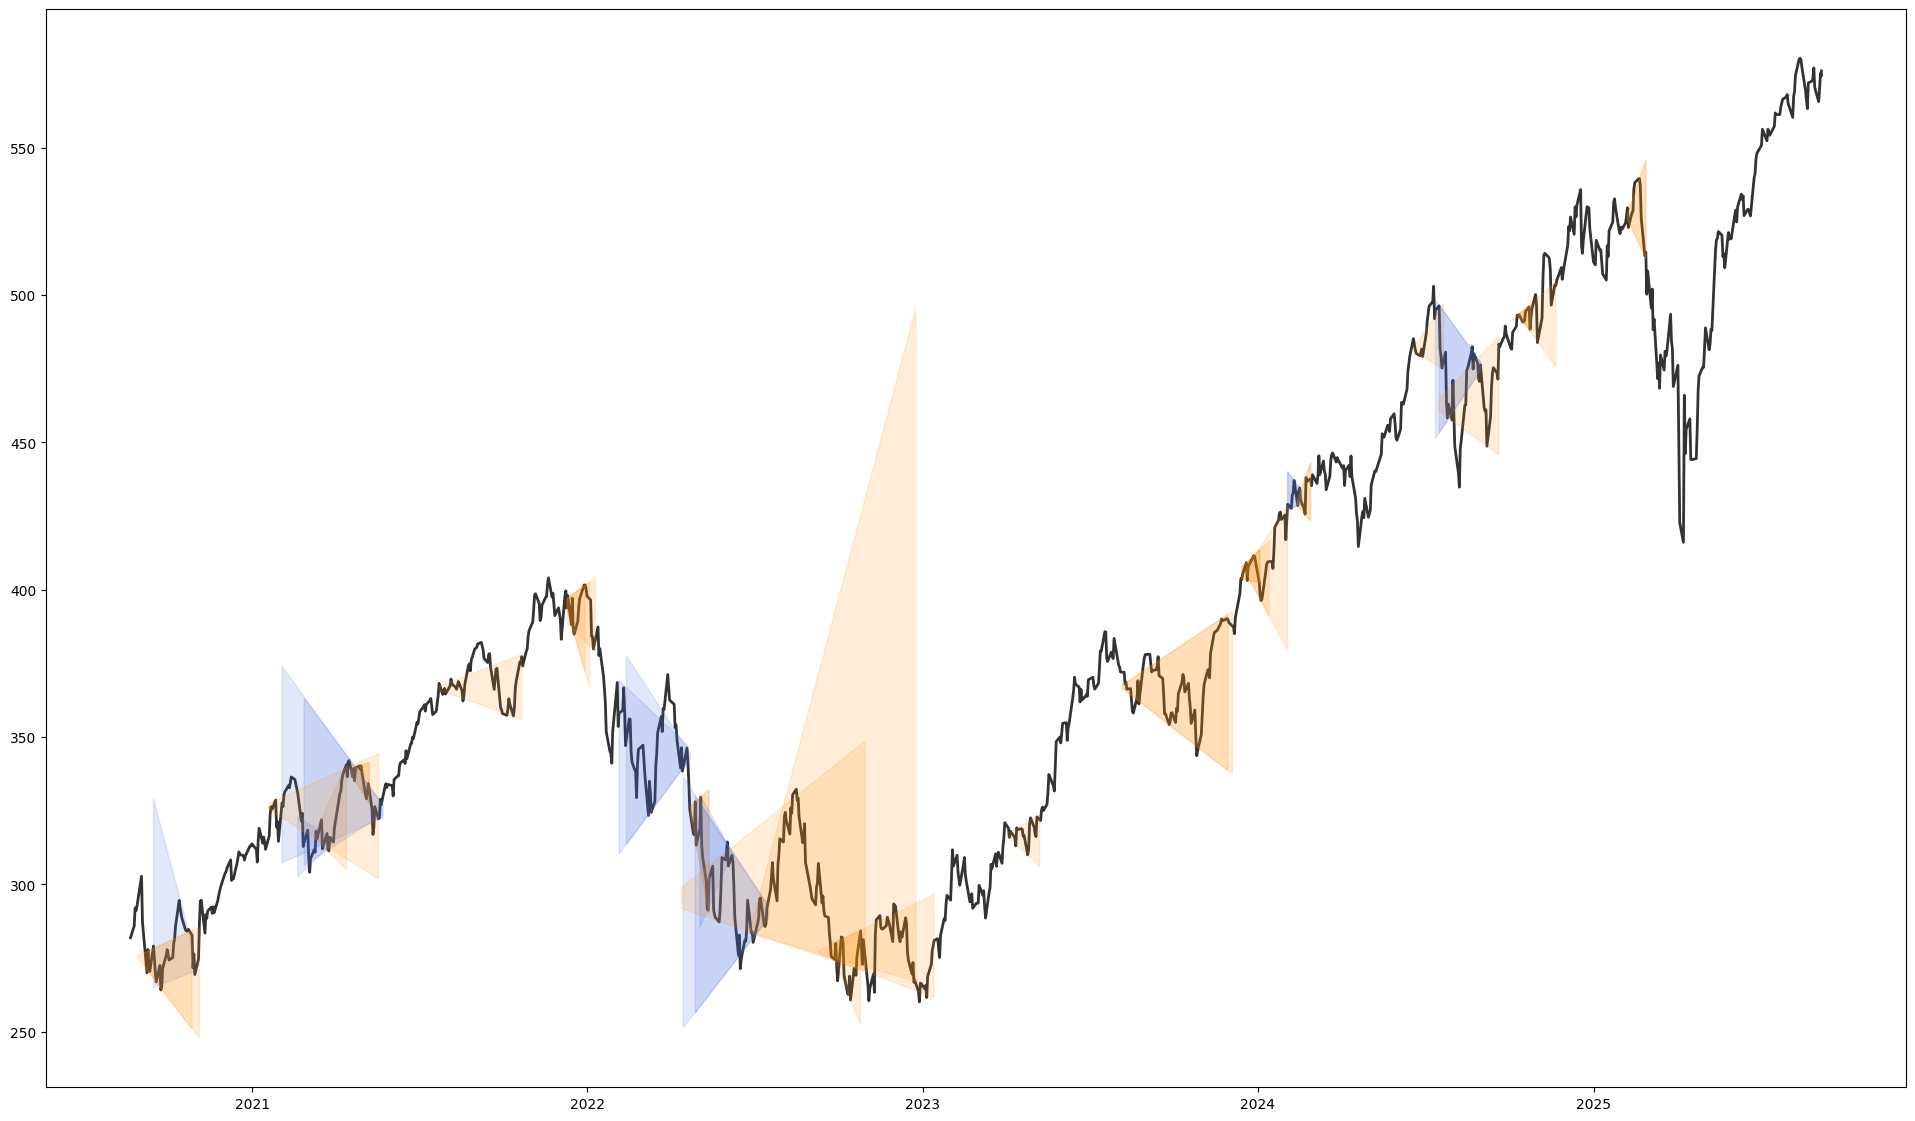

In [ ]:
# Display Comprehensive Overview of All Triangle Patterns
print("📊 Creating comprehensive overview chart with all triangle patterns...")
print("   🎯 Color coding: Green=Bullish, Red=Bearish, Blue=Continuation, Orange=Volatility")
print("   📈 Shows entire 3-year QQQ price history with overlaid patterns")
print("   ✅ Breakout confirmations marked with arrows")
print("="*80)

# Display the comprehensive chart with all patterns
if all_triangle_patterns:
    visualize_all_triangles_overview(stock_data, all_triangle_patterns)

    print(f"\n🎯 VISUAL PATTERN ANALYSIS INSIGHTS:")
    print(f"   📊 You can now see all {len(all_triangle_patterns)} triangle patterns in context")
    print(f"   🟠 Orange patterns (volatility) dominate - typical for ETFs")
    print(f"   🔵 Blue patterns (continuation) align with QQQ's trending nature")
    print(f"   ✅ Breakout arrows show which patterns successfully predicted direction")

    # Pattern effectiveness analysis
    breakout_patterns = [p for p in all_triangle_patterns if p['breakout_validation']]
    success_rate = len(breakout_patterns) / len(all_triangle_patterns) * 100

    print(f"\n📈 PATTERN EFFECTIVENESS:")
    print(f"   Success Rate: {success_rate:.1f}% ({len(breakout_patterns)}/{len(all_triangle_patterns)} patterns had confirmed breakouts)")

    if breakout_patterns:
        avg_breakout_strength = np.mean([p['breakout_validation']['strength'] for p in breakout_patterns])
        print(f"   Average Breakout Strength: {avg_breakout_strength:.1%}")

        bullish_breakouts = len([p for p in breakout_patterns if p['breakout_validation']['direction'] == 'bullish'])
        bearish_breakouts = len([p for p in breakout_patterns if p['breakout_validation']['direction'] == 'bearish'])
        print(f"   Breakout Direction: {bullish_breakouts} bullish, {bearish_breakouts} bearish")

    print(f"\n💡 TRADING INSIGHTS FROM VISUAL ANALYSIS:")
    print(f"   • QQQ triangle patterns are more about volatility management than direction")
    print(f"   • Expanding triangles (orange) signal increasing uncertainty")
    print(f"   • Symmetrical triangles (blue) often resolve in trend direction")
    print(f"   • Pattern formation periods coincide with major market events")
    print(f"   • Breakout strength varies significantly - size your positions accordingly")

else:
    print(f"\n⚠️ No patterns to display in comprehensive overview")
    print(f"   The lightning-fast analysis completed but found no qualifying patterns")

print(f"\n✅ Comprehensive triangle pattern visualization complete!")
print(f"   📊 Use this chart to visually assess pattern quality and timing")
print(f"   🎯 Focus on patterns with confirmed breakouts for trading insights")
print(f"   💡 Note how patterns cluster around major market events")